In [1]:
%pylab inline

import os, paper_style

Populating the interactive namespace from numpy and matplotlib


In [2]:
path = os.path.expandvars("$master/inputs/tta_cb13/set_cb13")
sfh_list = ["SSAG{0:06d}_z0p00".format(i+1) for i in xrange(140)]

mass1gyr, mass1myr = [], []
ur_rd, ur_nd, z_nd, t_nd = [], [], [], []
for sfh in sfh_list:
    t, sfr = loadtxt("{}/{}.sfr".format(path, sfh), unpack=True)
    sfh_pr = loadtxt("{}/{}nd.tparam".format(path, sfh), usecols=(1,19))
    col_nd = loadtxt("{}/{}nd.1ABmag".format(path, sfh), usecols=(1,2,3,4,5))
    col_rd = loadtxt("{}/{}.1ABmag".format(path, sfh), usecols=(1,2,3,4,5))
    
    mass = (0.5*(sfr[1:]+sfr[:-1])*(t[1:]-t[:-1])).sum()

    mass1myr.append((0.5*(sfr[1:]+sfr[:-1])*(t[1:]-t[:-1]))[t[1:]>=t.max()-1e6].sum()/mass)
    mass1gyr.append((0.5*(sfr[1:]+sfr[:-1])*(t[1:]-t[:-1]))[t[1:]>=t.max()-1e9].sum()/mass)
    z_nd.append(sfh_pr[0])
    t_nd.append(sfh_pr[1])
    ur_nd.append(col_nd[0]-col_nd[2])
    ur_rd.append(col_rd[0]-col_rd[2])

mass1myr = array(mass1myr)
mass1gyr = array(mass1gyr)
t_nd = array(t_nd)
z_nd = log10(array(z_nd))
ur_nd = array(ur_nd)
ur_rd = array(ur_rd)

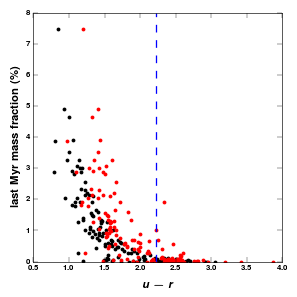

In [3]:
fig, ax = subplots(1, 1, figsize=(3.3,3.3))

plot(ur_nd, mass1myr*100., "ok", ms=3, mew=0)
plot(ur_rd, mass1myr*100., "or", ms=3, mew=0)
axvline(2.22, ls="--", color="b")

xlabel(r"\bf $u-r$")
ylabel(r"\bf last Myr mass fraction (\%)")

tight_layout()